[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arin-apin/utils/blob/main/keras_image_augmentation_viewer.ipynb)


In [3]:
#@title Imports


import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
#@title Download sample image from URL
URL = "https://upload.wikimedia.org/wikipedia/commons/f/f8/Coliseo-romano.jpg" #@param {type:"string"}
# Get our sample image and write it to disk
!wget $URL -O image.jpg

image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

In [6]:
#@title Definitions

def default_datagen():
  '''Returns a default ImageDataGenerator without any transformation enabled.'''
  datagen = ImageDataGenerator( fill_mode='nearest', dtype=int)
  datagen.fit(data)
  return datagen

def plot_augmentation(datagen, data, n_rows=3, n_cols=3):

  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    # print(image.min(), image.max(), image.dtype)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0]/255)

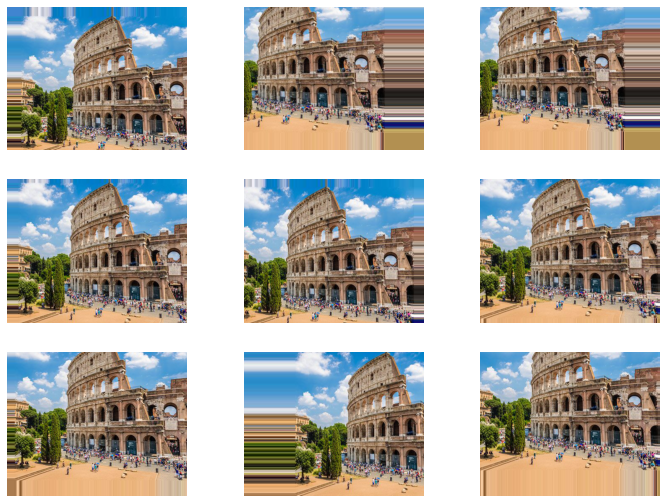

In [7]:
#@title Translation transformation

width_shift_range = 0.3 #@param {type:"slider", min:0, max:1, step:0.05}
height_shift_range = 0.2 #@param {type:"slider", min:0, max:1, step:0.05}
datagen = default_datagen()
datagen.width_shift_range = width_shift_range
datagen.height_shift_range = height_shift_range
plot_augmentation(datagen, data)

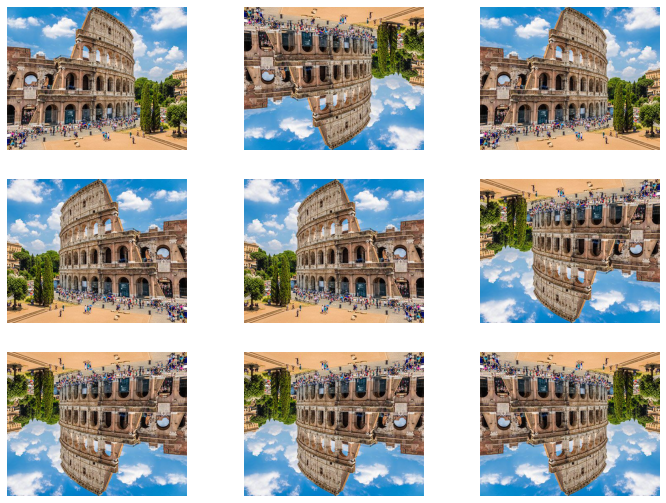

In [40]:
#@title Flip transformation
Horizontal = True #@param {type:"boolean"}
Vertical = True #@param {type:"boolean"}

datagen = default_datagen()
datagen.horizontal_flip = Horizontal
datagen.vertical_flip = Vertical
plot_augmentation(datagen, data)

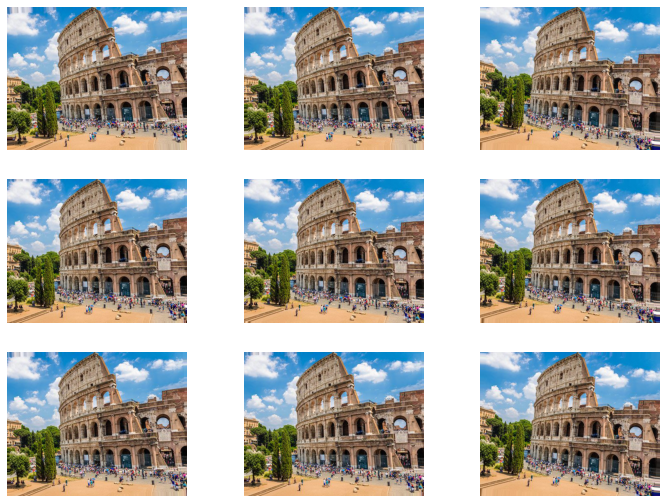

In [8]:
#@title Rotation transformation

rotation = 5 #@param {type:"slider", min:0, max:90, step:5}

datagen = default_datagen()
datagen.rotation_range = rotation
plot_augmentation(datagen, data)

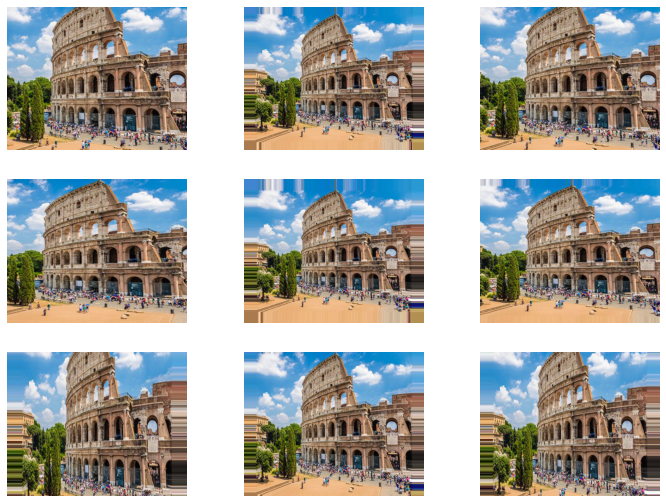

In [42]:
#@title Zoom transformation

In = 0.7 #@param {type:"slider", min:0, max:1, step:0.05}
Out = 1.2 #@param {type:"slider", min:1, max:2, step:0.05}
datagen = default_datagen()
datagen.zoom_range = [In,Out]
plot_augmentation(datagen, data)

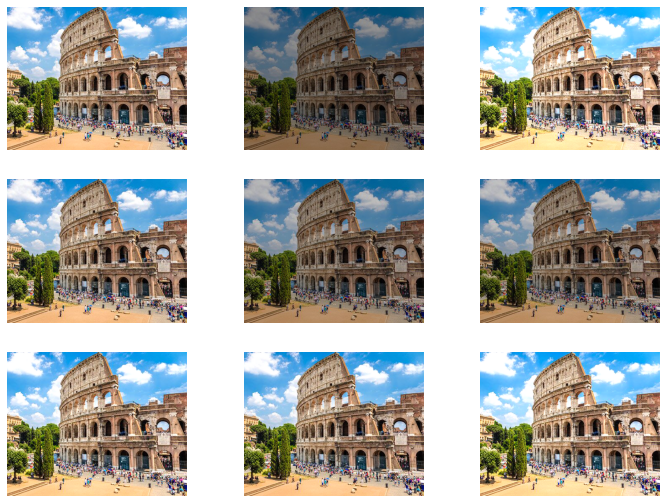

In [9]:
#@title Brightness transformation

Dark = 0.55 #@param {type:"slider", min:0, max:1, step:0.05}
Bright = 1.3 #@param {type:"slider", min:1, max:2, step:0.05}
datagen = default_datagen()
datagen.brightness_range = [Dark,Bright]
plot_augmentation(datagen, data)